# Scoring metrics comparison

### How the scoring metric influence the ranking between models?

In [24]:
import autopandas as apd
import numpy as np
%reload_ext autoreload
%autoreload 2

from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, brier_score_loss, f1_score, log_loss, precision_score, recall_score, jaccard_score, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [25]:
!ls autopandas/data

adult.csv	  datasets.py	iris.csv       seeds.csv     titanic_test.csv
boston_test.csv   diabetes.csv	mushrooms.csv  squares1.csv  titanic_train.csv
boston_train.csv  __init__.py	__pycache__    squares2.csv  wine.csv


In [28]:
# WINE
data = apd.datasets.load_wine()

In [30]:
data.descriptors()

,task,shape,ratio,sparsity,class_deviation,categorical_ratio,missing_ratio,max_skewness,mean_skewness,min_skewness
0,classification,"(4898, 12)",0.00245,0.000323,0.885639,0.75,0.0,5.023331,1.205035,0.155796


In [31]:
data('header')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
metrics = [accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss, roc_auc_score]
# average_precision_score, brier_score_loss, 
classifiers = [RandomForestClassifier(), MLPClassifier(hidden_layer_sizes=(10,)), LinearSVC(), GaussianNB(), DecisionTreeClassifier()]
# LinearRegression()

In [33]:
def model_name(clf):
    return str(clf).split('(')[0]

def metric_name(mtr):
    return str(mtr).split(' ')[1]

def columns_to_rank(df):
    new_df = df.copy()
    for column in columns:
        new_df[column] = apd.generators.copula.vector_to_rank(df[column], reverse=False)
    return new_df

In [34]:
columns = list(map(metric_name, metrics)) 
index = list(map(model_name, classifiers))
values = np.zeros((len(classifiers), len(metrics)))
for i, clf in enumerate(classifiers):
    for j, mtr in enumerate(metrics):
        try:
            score = data.score_error_bars(n=5, metric=mtr, model=clf)[0]
        except:
            # TODO: print exception?
            score = -1
        values[i][j] = score
results = apd.AutoData(values, columns=columns, index=index)
results_rank = columns_to_rank(results)

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adrien/.pyenv/versions/py37/lib

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/adrien/.pyenv/versions/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarni

In [35]:
results

,accuracy_score,balanced_accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss,roc_auc_score
RandomForestClassifier,0.660722,0.356061,0.650215,0.683940,0.661538,0.491052,0.924341,0.845978
MLPClassifier,0.468346,0.176267,0.387319,0.404495,0.461811,0.254143,1.216661,0.633166
LinearSVC,0.376719,0.167452,0.283819,0.325840,0.415657,0.165646,-1.000000,-1.000000
GaussianNB,0.430905,0.319586,0.423488,0.441166,0.430905,0.272198,1.562742,0.750717
DecisionTreeClassifier,0.594418,0.359643,0.594499,0.591767,0.597413,0.428184,13.886046,0.663651


In [36]:
results_rank

,accuracy_score,balanced_accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss,roc_auc_score
RandomForestClassifier,5,4,5,5,5,5,2,5
MLPClassifier,3,2,2,2,3,2,3,2
LinearSVC,1,1,1,1,1,1,1,1
GaussianNB,2,3,3,3,2,3,4,4
DecisionTreeClassifier,4,5,4,4,4,4,5,3


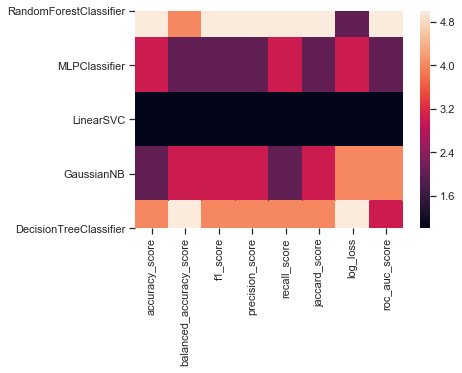

In [37]:
results_rank.plot()

In [38]:
results_rank.drop('log_loss', axis=1)
results_rank.mean(axis=1)

RandomForestClassifier    4.500
MLPClassifier             2.375
LinearSVC                 1.000
GaussianNB                3.000
DecisionTreeClassifier    4.125
dtype: float64